In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from IPython.display import Image
from skimage.transform import resize
from skimage.io import imread, imshow
import plotly.graph_objects as go

In [3]:
ETHNICITIES = { 0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Hispanic" }
GENDERS = { 0: "Male", 1: "Female" }

In [4]:
df = pd.read_csv('./data/age_gender.csv')

In [5]:
df = df.drop(['img_name'], axis=1)
df["pixels"] = df["pixels"].apply(lambda x: np.array(x.split(),dtype="float32"))
df['pixels'] = df['pixels'].apply(lambda x: x.reshape(48, 48, 1))
df['pixels'] = df['pixels'].apply(lambda x: x / 255.)

# EDA

In [6]:
def graph_dist(x,y,name):
    fig = go.Figure([go.Bar(x=x, y=y)])
    fig.update_layout(title_text=name)
    fig.show()

In [12]:
## normalizing pixels data
# data['pixels'] = df['pixels'].apply(lambda x: x/255)

## calculating distributions
age_dist = df.loc[df['age'] < 70]['age'].value_counts()
ethnicity_dist = df['ethnicity'].value_counts()
gender_dist = df['gender'].value_counts().rename(index={0:'Male',1:'Female'})



# AGE Distribution

In [13]:
graph_dist(x=age_dist.index, y=age_dist.values, name='Age Distribution')

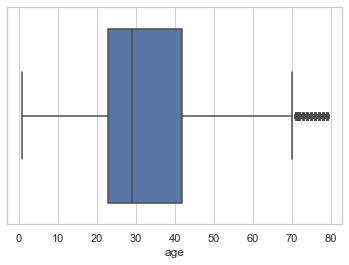

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.loc[df['age'] < 80 ]["age"])

In [17]:
df["age"].describe()

count    23705.000000
mean        33.300907
std         19.885708
min          1.000000
25%         23.000000
50%         29.000000
75%         45.000000
max        116.000000
Name: age, dtype: float64

# Ethnicity : Data Imbalance check

In [18]:
ethnicity_index=["0:White","1:Black", "2:Asian", "3:Indian", "4:Hispanic"]
graph_dist(x=ethnicity_index, y=ethnicity_dist.values, name='Ethinicity count')

# Gender : Data Imbalance check

In [19]:
gender_index=["0:Male", "1:Female"]
graph_dist(x=gender_index, y=gender_dist.values, name='Gender count')

# Image samples

In [20]:
X = np.array(df['pixels'].tolist())
X.shape

(23705, 48, 48, 1)

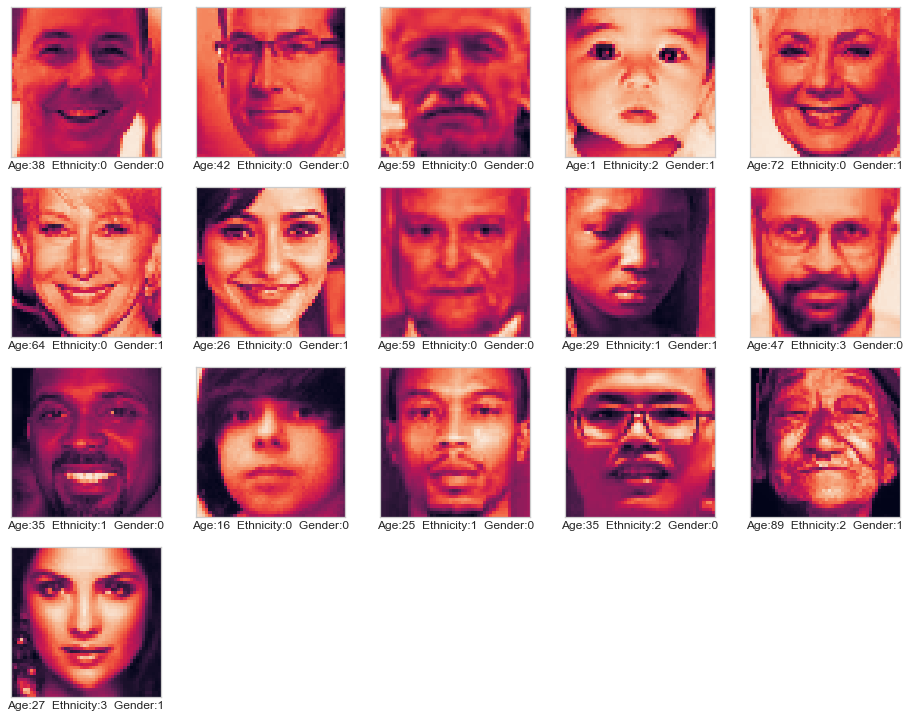

In [24]:
plt.figure(figsize=(16,16))
random_indices = np.random.randint(0, 23705, 16)
for i in range(len(random_indices)):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[random_indices[i]].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[random_indices[i]])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[random_indices[i]])+
        "  Gender:"+ str(df['gender'].iloc[random_indices[i]])
    )
plt.show()